In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import rwpropa as rw
from threading import Thread

#### Spherical source with spherical observer

In [22]:
def simulate(file_name):
    sim = rw.PlasmoidSimulation(nr_particles = 10**5, radius = 10**14, energy = 10**15, nr_steps = 1*10**6, diffusion_coefficient = 1.5*10**20, step_size = 1*10**11)
    %time sim.simulate(file_name)
    sim.plot_arrival_times()
    print('finished: ', file_name)

simulate with a diffusion coefficient of  1.5e+20 m²/s
start simulation
Propagator initialized
Observer initialized
saved data file data/tut_7_test.pkl
CPU times: user 3min 39s, sys: 124 ms, total: 3min 39s
Wall time: 3min 39s
init statistics plotting class


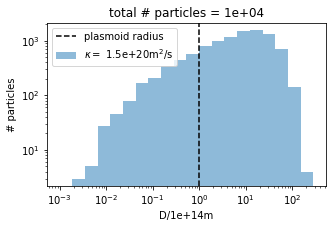

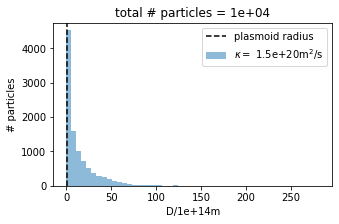

finished:  data/tut_7_test


In [23]:
simulate('data/tut_7_test')

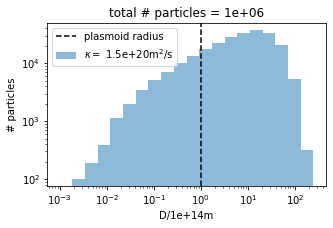

In [38]:
trajectory_lengths = np.load('merged.npy')
diff = 1.5*10**20
radius = 10**14
nr_particles = 10**6
plt.figure(figsize=(5,3))
bins = 20
d = trajectory_lengths/10**14
hist, bins = np.histogram(d, bins=bins)
logbins = np.logspace(np.log10(min(d)),np.log10(max(d)),len(bins))
plt.hist(d, bins=logbins, alpha=0.5, label='$\kappa =$ {:.1e}m$^2$/s'.format(diff))
plt.axvline(x=1, color='k', ls='--', label='plasmoid radius')
plt.title('total # particles = {:.0e}'.format(nr_particles))
plt.xlabel('D/{:.0e}m'.format(radius))
plt.ylabel('# particles')
plt.loglog()
plt.legend()
plt.show()

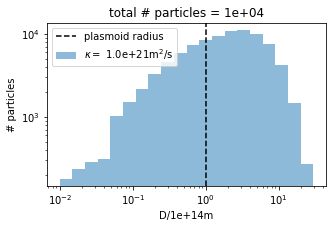

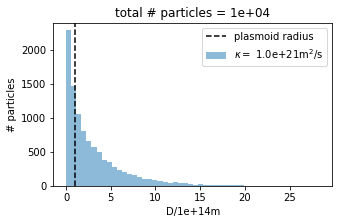

In [19]:
t = np.array([])
for i in range(1,10):
    
    df = pd.read_pickle('data_'+str(i)+'.pkl')
    t = np.append(df['d'].values.tolist(), t)
 
#todo
analyze(t, diff, nr_particles=nr_particles)